## TOP 10 Frequent Words

### Create functions to split words in a string

In [1]:

def trimmer(x, split=True):
    # remove the white space from each cell value
  
    if not split:
        chars = x.split()
        trim_chars = [char.strip().lower() for char in chars]
        trim_chars = ' '.join(trim_chars)
    else:
        chars = str(x).split()
        trim_chars = [char.strip().lower() for char in chars]
    return trim_chars


def string_maker(x,remove_special_chars=False,exceptions=False):
    '''
    Convert input into string. If special_chars is true then remove all the special characters from
    string. If exceptions list is provided ex. "exceptions: ['.',':'] then the special characters will be 
    exempted from removal. 
    '''
    x = str(x)
    special_characters = ['\'','.',',',':',';','"','<','>','*','@','%','!','?','’','”','(',')','--','“']
    if exceptions:
        for item in special_characters:
            if item in exceptions:
                special_characters.remove(item)

    if remove_special_chars:
        for i in special_characters:
            x = x.replace(i,'')
            
    x = trimmer(x,split=True)
    return x





### import Library and import data

In [2]:
import pandas as pd
df = pd.read_csv('story.txt',sep='\n', header = None)
words = pd.read_csv('stopwords.txt',sep='\n',header=None)

### Add words from exception file into __palabras__ list

In [3]:
palabras = [words[i:i+1].iloc[0][0] for i in range(0,len(words))]


### Add words from reading file into a list

In [4]:
list = [df[i:i+1].iloc[0][0] for i in range(0,len(df))]

### Split words and add all words not found in the palabras list into a dictionary

In [5]:
dict = {}

for i in list:
    ## split words 
    items = string_maker(i,True,False)
    
    for item in items:
    ## Remove words from palabras list
        if item not in palabras:            
            if item in dict:
                dict[item] += 1
            else:
                dict[item] = 1
            

### Print the top 10 most frequent words

In [15]:
count = 0
output = {}
# sort dictionary by value 
for key, value in sorted(dict.items(),reverse = True, key=lambda item: item[1]):
    print('{}: {}'.format(key, value))
    count  += 1
    output[key] = value
    
    if count == 10:
        break


said: 660
mr: 620
one: 438
lorry: 336
will: 295
upon: 291
man: 279
defarge: 279
little: 265
time: 260


### Visualize data

In [137]:
df = pd.DataFrame.from_dict(output, orient='index')

df['frequency'] = df[0]
del df[0]

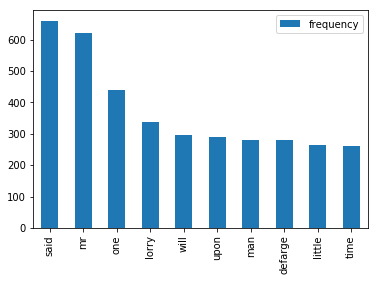

In [139]:
df.plot.bar()